<center> <h3> DS 3500 — Fall 2021</h3> </center>
<center><h1> Natural Language Processing and Supervised Machine Learning Methods to Predict Stock Price Change from Earnings Call Transcripts </h1></center> 
<center><h4>  By: Qi Li, Kelly Phalen, Marco Tortolani, Emily Wang, Xinyu Wu </h4></center> 

## Outline
[1. PDFCleaner](#1.-PDFCleaner)

[2. StockPuller](#2.-StockPuller)

[3. PerformanceTester](#3.-PerformanceTester)

[4. Transcripts](#4.-Transcripts)

[5. Database](#5.-Database)

[6. Vectorizers](#6.-Vectorizers)

[7. Principal Component Analysis](#7.-Principal-Component-Analysis)

[8. Base Models](#8.-Base-Models)

[9. Hyperparameter Tuning](#9.-Hyperparameter-Tuning)

[10. Cross-Validation](#10.-Cross-Validation)

[11. Model Performance](#11.-Model-Performance)

## 1. PDFCleaner

In [5]:

file = "transcripts/SBUX_transcripts/20211028_Starbucks_Corp-_Earnings_Call_2021-10-28_DN000000002966775416.pdf"
ticker = 'SBUX'
date = '20211028'
path_to_project = "C:/Users/mtort/Repositories/DS3500-Final-Project"


In [3]:
from PdfCleaner import PdfCleaner



cleaner = PdfCleaner(file)
cleaned_text=cleaner.clean_stopwords_punctuation()
# origin.print_cleanedText()
print(cleaner.lenBeforeClean())
print(cleaner.lenAfterClean())

Company Name Starbucks Corp Company Ticker SBUX US Equity Date 20211028 Q4 2021 Earnings Call Company Participants Greg Smith Vice President Investor Relations L John Culver Group President North America Chief Operating Oﬃcer A N Kevin Johnson President Chief Executive Oﬃcer I F Leo Tsoi Chairman Chief Executive Oﬃcer Starbucks China Rachel Ruggeri Chief Financial Oﬃcer Unidentiﬁed Speaker Other Participants Andrew Charles David Tarantino Jeﬀrey Bernstein Analyst John Glass John Ivankoe John Tower Analyst Sara Senatore Sharon Zackﬁa t Unidentiﬁed Participant p r c Presentation s n Operator r T Good afternoon My Alex I conference operator today g I like welcome Starbucks Fourth Quarter Fiscal Year End 2021 r e Conference Call b m All lines placed mute prevent background noise After speakers remarks questionandanswer session Operator Instructions o o I turn Greg Smith Vice President Investor Relations Mr Smith l B begin conference Greg Smith BIO 22395447 GO Good afternoon everyone thank 

## 2. StockPuller

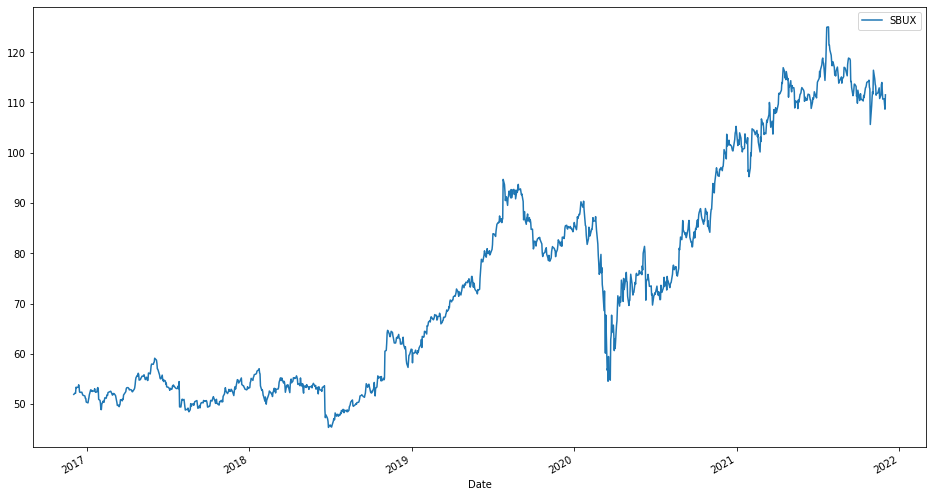

0.07231066878704784


In [7]:
from StockPuller import StockPuller

Puller = StockPuller()
Puller.plotStock(ticker)
print(Puller.changeOverDays(ticker, date, 1))


## 3. PerformanceTester

In [18]:
from PerformanceTesting import PerformanceTester

Tester = PerformanceTester()
articles = [[ticker, date, cleaned_text]]
Tester.loadArticles(articles)
Tester.setTimeframe('day', 1)
xy = Tester.aquireTargetValues()
X = xy[0]
y = xy[1]
print('This is the text in list format to input into the model: \n', [text[:1000] for text in X], '\n\n\n', 
        'This is the classification in list format (1 for positive movement 0 for negative movement):', y)


This is the text in list format to input into the model: 
 ['Company Name Starbucks Corp Company Ticker SBUX US Equity Date 20211028 Q4 2021 Earnings Call Company Participants Greg Smith Vice President Investor Relations L John Culver Group President North America Chief Operating Oﬃcer A N Kevin Johnson President Chief Executive Oﬃcer I F Leo Tsoi Chairman Chief Executive Oﬃcer Starbucks China Rachel Ruggeri Chief Financial Oﬃcer Unidentiﬁed Speaker Other Participants Andrew Charles David Tarantino Jeﬀrey Bernstein Analyst John Glass John Ivankoe John Tower Analyst Sara Senatore Sharon Zackﬁa t Unidentiﬁed Participant p r c Presentation s n Operator r T Good afternoon My Alex I conference operator today g I like welcome Starbucks Fourth Quarter Fiscal Year End 2021 r e Conference Call b m All lines placed mute prevent background noise After speakers remarks questionandanswer session Operator Instructions o o I turn Greg Smith Vice President Investor Relations Mr Smith l B begin confere

## 4. Transcripts

In [29]:
from store_transcripts import Transcripts
from pymongo import MongoClient
client = MongoClient()
client.drop_database('starbucks_transcripts')
db = client.starbucks_transcripts

store = Transcripts(ticker)

store.path = path_to_project+"/transcripts/"+ticker+"_transcripts/"
transcripts = store.create_dct()
print(transcripts[0]['transcript'][:1000])
# db.starbucks_transcripts.insert_many(transcript)
# print(ticker + " transcripts stored successfully")

Company Name Starbucks Corp Company Ticker SBUX US Equity Date  Q  Earnings Call Company Participants Greg Smith Vice President Investor Relations L John Culver Group President North America Chief Operating Oﬃcer A N Kevin Johnson President Chief Executive Oﬃcer I F Leo Tsoi Chairman Chief Executive Oﬃcer Starbucks China Rachel Ruggeri Chief Financial Oﬃcer Unidentiﬁed Speaker Other Participants Andrew Charles David Tarantino Jeﬀrey Bernstein Analyst John Glass John Ivankoe John Tower Analyst Sara Senatore Sharon Zackﬁa t Unidentiﬁed Participant p r c Presentation s n Operator r T Good afternoon My Alex I conference operator today g I like welcome Starbucks Fourth Quarter Fiscal Year End  r e Conference Call b m All lines placed mute prevent background noise After speakers remarks questionandanswer session Operator Instructions o o I turn Greg Smith Vice President Investor Relations Mr Smith l B begin conference Greg Smith BIO  GO Good afternoon everyone thank joining today discuss Sta

## 5. Database

In [45]:
class Database:
    def __init__(self):
        client = MongoClient()
        client.drop_database('transcripts')
        self.db = client.transcripts

    def store_data(self, tickers_lst):
        for t in tickers_lst:
            store = Transcripts(t)
            transcript = store.create_dct()
            self.db.transcript.insert_many(transcript)
            print(t + " transcripts stored successfully")
        return self.db

### Import Transcripts for Top 20 NASDAQ Companies by Market Cap

In [48]:
''' To prevent "IOPub data rate exceeded error":
enter into terminal: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 '''

tickers = ['AAPL', 'ADBE', 'AMZN', 'ASML', 'AVGO', 'CMCSA', 'COST',  'CSCO', 'FB', 'GOOGL',
           'INTC', 'MSFT', 'NFLX', 'NVDA', 'PDD', 'PEP', 'PYPL', 'TMUS', 'TSLA', 'TXN']

database = Database()
db = database.store_data(tickers)

                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/AAPL_transcripts/20161025_Apple_Inc-_Earnings_Call_2016-10-25_FS000000002309526178.pdf Not Added
                          
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/AAPL_transcripts/20161025_Apple_Inc-_Earnings_Call_2016-10-25_FS000000002309526172.pdf Not Added
                          
AAPL transcripts stored successfully
ADBE transcripts stored successfully
                          Earnings Transcript /Users/xinyuwu/Desktop/fall21/ds3500/DS3500-Final-Project/transcripts/AMZN_transcripts/20190426_Amazon.com_Inc-_Earnings_Call_2019-4-25_DN000000002663104261.pdf Not Added
                          
AMZN transcripts stored successfully
ASML transcripts stored successfully
AVGO transcripts stored successfully
CMCSA transcripts stored successfully
                          Earnings Transcript /Users/

## 6. Vectorizers

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
def query_data():
    ''' Function to query for all transcripts and store as list '''
    all_companies = db.transcript.find()

    data = {}
    text = []

    for transcript in all_companies:
        data[transcript["name"]+" "+transcript["date"]] = transcript["transcript"]
        text.append(transcript["transcript"])
    
    return data, text

def tfidf(text):
    ''' Tfidf vectorizer to match words to TFIDF values '''
    vect = TfidfVectorizer(min_df=3, ngram_range = (1, 1)).fit(text)
    bag_of_words = vect.transform(text)
    feature_names = vect.get_feature_names()

    tfidf_df = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)
    display(tfidf_df)
    return tfidf_df, bag_of_words

In [81]:
data, text = query_data()
tfidf_df, bag_of_words = tfidf(text)

,aaa,aapl,aaron,ab,abandon,abandoned,abandonment,abate,abatement,abating,...,ﬂuctuates,ﬂuctuation,ﬂuctuations,ﬂuid,ﬂuidity,ﬂush,ﬂux,ﬂy,ﬂying,ﬂywheel
0,0.0,0.180664,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.165782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.007406,0.009567,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.104560,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.104032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.182241,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
544,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
545,0.0,0.000000,0.027292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
546,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 7. Principal Component Analysis

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
def pca_df(bag_of_words):
    ''' PCA to reduce total number of features before feeding into ML model '''
    # instantiate the PCA object and request reduced number of components (reduces number of columns/features)
    pca = PCA(n_components=150, random_state=3000)


    # standardize the features so they are all on the same scale
    features_standardized = StandardScaler().fit_transform(bag_of_words.toarray())

    # transform the standardized features using the PCA algorithm 
    reduced_data = pca.fit_transform(features_standardized)

    # show transformed results in dataframe
    pca_df = pd.DataFrame(reduced_data)#, columns = components)

    ''' Obtain target values (whether stock price increased, decreased, or stayed the same) 
    from database '''
    price_changes = []
    all_transcripts = db.transcript.find()
    for transcript in all_transcripts:
        price_changes.append(transcript['price_change'])

    pca_df['target'] = price_changes 

    return pca_df

In [90]:
pca_df = pca_df(bag_of_words)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,target
0,4.346558,-4.687576,-6.215062,5.370536,-1.404635,-4.559129,13.821442,16.252597,49.966649,51.039385,...,2.896040,1.992734,-1.870281,0.705100,6.747039,1.281073,-2.736667,-2.002284,-2.784893,0
1,1.123418,-6.398258,-5.925861,1.778670,-1.360708,-1.191740,7.924369,12.187728,37.578261,36.973525,...,6.218302,2.639724,7.159558,8.901293,8.922766,-5.905553,-2.390585,2.293491,-0.907613,0
2,2.159055,1.566221,-1.420570,1.631855,-2.466665,5.927075,15.041635,12.578331,24.624394,33.269776,...,-1.902092,-1.964432,2.307943,-2.809301,-0.152702,3.559455,-2.590948,-1.439262,-1.778698,1
3,-1.305296,5.015556,0.228285,0.169621,-2.485127,4.234853,13.182361,9.575053,15.555193,27.697926,...,-6.614588,-7.309828,4.694766,-6.028378,-12.928297,2.453018,-1.538861,5.416194,-6.698281,1
4,0.106394,-6.859777,-3.049865,1.528136,0.507199,-5.833811,7.790771,13.168363,38.031913,36.830638,...,3.225038,-1.006926,-6.063329,9.916437,-5.901981,-7.003289,-7.145146,1.530199,1.970310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,-3.903271,12.191566,9.006009,-9.259527,-1.997461,-7.637875,10.095003,-1.511613,-7.952817,5.358870,...,8.770708,1.793150,1.792784,-0.852850,-2.160316,-5.593881,-4.084236,-3.240951,-1.233067,1
544,-4.927434,11.608205,8.619548,-10.411061,-1.483200,-6.530006,9.904218,-2.186515,-7.529064,4.991597,...,-2.351804,-2.918117,0.505993,-1.763750,3.021983,0.779503,2.327977,-1.431041,-0.700881,0
545,-5.828013,7.678266,8.622503,-11.840058,0.899941,-22.822770,0.188729,-5.741302,-1.425461,-0.774465,...,0.029810,-2.946962,-0.240642,-0.390996,3.000510,-0.172166,-1.983885,0.187365,-1.894125,1
546,-2.749447,7.552831,10.715735,-12.019985,-0.782433,-22.687972,0.103086,-3.374163,-3.310945,0.747716,...,-1.672627,1.009514,-1.365493,-1.592501,-0.037684,1.844884,0.250539,-0.843542,1.717097,0


## 8. Base Models

In [132]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Dictionary of ML Algorithms

In [133]:
estimators = {
    'Logistic Regression' : LogisticRegression(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()}

### Create Empty Dataframe to Store Performance Metrics

In [134]:
def metrics_df(parameters, estimators):
    # Empty lists to add estimator models and model selection types as column labels
    methods = []
    models = []

    # Add to column names using estimators dictionary
    for parameter in parameters:
        for key, value in estimators.items():
            methods.append(parameter)
            models.append(key)

    # Performance metrics for each target value (0: Decrease, 1: Increase)
    report_keys = ['0', '1']

    # Different metrics and grouping functions
    report_agg = ['macro avg', 'weighted avg']
    report_values = ['precision', 'recall', 'f1-score', 'support']

    # Initialize empty lists to add metric names
    column_idx = []
    column_metric = []

    # Add to list of row names
    # For performance metrics based off of target value (0, 1)
    for key in report_keys:
        for value in report_values:
            column_idx.append(key)
            column_metric.append(value)

    # For accuracy performance metric
    column_idx.append('all')
    column_metric.append('accuracy')

    # For aggregate performance metrics
    for agg in report_agg:
        for value in report_values:
            column_idx.append(agg)
            column_metric.append(value)

In [135]:
parameters = ['Base', 'Cross-Validated GridSearch', 'KFold Cross-Validation']

metrics_df(parameters, estimators)

### Use Predefined Columns and Rows to Initialize Empty Dataset for Evaluation Metrics

In [136]:
# Define columns and rows (indices) for empty dataframe
columns = [methods, models]
indices = [column_idx, column_metric]

# Fill dataframe with 0 values (to be replaced with actual performance metric values)
data = [ [0] * len(methods) for _ in range(len(column_idx))]

# Create dataframe to store evaluation metrics
performance = pd.DataFrame(data, columns = columns, index = indices)
performance

Base                         \
                       Logistic Regression Support Vector Machine   
0            precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
1            precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
all          accuracy                    0                      0   
macro avg    precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   
weighted avg precision                   0                      0   
             recall                      0                      0   
             f1-score                    0                      0   
             support                     0                      0   

                                                           \
                       Gaussian Naive Bayes Decision Tree   
0            precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
1            precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
all          accuracy                     0             0   
macro avg    precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   
weighted avg precision                    0             0   
             recall                       0             0   
             f1-score                     0             0   
             support                      0             0   

                       Cross-Validated GridSearch                         \
                              Logistic Regression Support Vector Machine   
0            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
1            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
all          accuracy                           0                      0   
macro avg    precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
weighted avg precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   

                                                           \
                       Gaussian Naive Bayes Decision Tree   

### Function to Add Evaluation Scores to Performance Dataframe

In [137]:
def metrics(method, estimator, model, predicted, y_test):
    """ method: scaling, sampling, hyperparameter tuning, etc
        estimator: different models (knn, decision tree, naive bayes)
        model: trained model from given method and estimator
        predicted: using model to run on test set and find predicitons
        y_test: actual values corresponding to predictions"""
    
    # Find predicted and expected outcomes of model
    expected = y_test
    
    # Calculate classification report corresponding to model
    report = classification_report(y_true=expected, y_pred=predicted, output_dict=True)
    
    # Initialize empty list to append and store evaluation matrix values
    data = []
    
    # Add in order of performance dataframe indices
    # Append performance scores for target values (0, 1)
    for i in range(2):
        dct = report[str(i)]
        for metric, value in dct.items():
            data.append(value)
    
    # Append accuracy score
    data.append(report['accuracy'])
    
    # Append aggregated performance scores
    report_labels = ['macro avg', 'weighted avg']
    for label in report_labels:
        for metric, value in report[label].items():
            data.append(value)
    
    # From data list, add in each value to corresponding spot in predefined performance dataframe
    for i in range(len(data)):
        performance[method, estimator].iloc[i] = data[i]

In [138]:
def base_models(estimators, pca_df):
    features = pca_df.drop("target", axis = 1)
    target = pca_df["target"]

    for estimator_name, estimator_object in estimators.items():
        # split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

        # select a classifier and create the model by fitting the training data
        model = estimator_object.fit(X=X_train, y=y_train)

        # prediction accuracy
        accuracy_test = model.score(X_test, y_test)
        accuracy_train = model.score(X_train, y_train)
        predicted = model.predict(X=X_test)
        print(estimator_name, ":")
        print("Prediction accuracy on the test data:", f"{accuracy_test:.2%}", "\n")
        print("Prediction accuracy on the test data:", f"{accuracy_train:.2%}", "\n")
        metrics('Base', estimator_name, model, predicted, y_test)

In [139]:
base_models(estimators, pca_df)

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Logistic Regression :
Prediction accuracy on the test data: 63.50% 

Prediction accuracy on the test data: 87.83% 

Support Vector Machine :
Prediction accuracy on the test data: 65.69% 

Prediction accuracy on the test data: 87.10% 

Gaussian Naive Bayes :
Prediction accuracy on the test data: 66.42% 

Prediction accuracy on the test data: 71.78% 

Decision Tree :
Prediction accuracy on the test data: 65.69% 

Prediction accuracy on the test data: 100.00% 



/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

## 9. Hyperparameter Tuning

## 10. Cross-Validation

In [114]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
features = pca_df.drop("target", axis = 1)
target = pca_df["target"]

for estimator_name, estimator_object in estimators.items():
    #split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

    #select a classifier and create the model by fitting the training data
    model = estimator_object.fit(X=X_train, y=y_train)

    #prediction accuracy
    accuracy = model.score(X_test, y_test)
    print(estimator_name, ":")
    print("Prediction accuracy on the training data:", format(model.score(X_train, y_train)*100, ".2f"))
    print("Prediction accuracy on the test data:", f"{accuracy:.2%}", "\n")
    
#     kfold = KFold(n_splits=10, random_state=3000, shuffle=True)
    
#     scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
#     print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' + f'standard deviation={scores.std():.2%}' +"\n")

/Users/xinyuwu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression :
Prediction accuracy on the training data: 87.83
Prediction accuracy on the test data: 63.50% 

Support Vector Machine :
Prediction accuracy on the training data: 87.10
Prediction accuracy on the test data: 65.69% 

Gaussian Naive Bayes :
Prediction accuracy on the training data: 71.78
Prediction accuracy on the test data: 66.42% 

Decision Tree :
Prediction accuracy on the training data: 100.00
Prediction accuracy on the test data: 63.50% 



# 11. Model Performance

In [140]:
performance

Base                         \
                       Logistic Regression Support Vector Machine   
0            precision            0.623377               0.637500   
             recall               0.695652               0.739130   
             f1-score             0.657534               0.684564   
             support             69.000000              69.000000   
1            precision            0.650000               0.684211   
             recall               0.573529               0.573529   
             f1-score             0.609375               0.624000   
             support             68.000000              68.000000   
all          accuracy             0.635036               0.656934   
macro avg    precision            0.636688               0.660855   
             recall               0.634591               0.656330   
             f1-score             0.633455               0.654282   
             support            137.000000             137.000000   
weighted avg precision            0.636591               0.660685   
             recall               0.635036               0.656934   
             f1-score             0.633630               0.654503   
             support            137.000000             137.000000   

                                                           \
                       Gaussian Naive Bayes Decision Tree   
0            precision             0.626374      0.652778   
             recall                0.826087      0.681159   
             f1-score              0.712500      0.666667   
             support              69.000000     69.000000   
1            precision             0.739130      0.661538   
             recall                0.500000      0.632353   
             f1-score              0.596491      0.646617   
             support              68.000000     68.000000   
all          accuracy              0.664234      0.656934   
macro avg    precision             0.682752      0.657158   
             recall                0.663043      0.656756   
             f1-score              0.654496      0.656642   
             support             137.000000    137.000000   
weighted avg precision             0.682341      0.657126   
             recall                0.664234      0.656934   
             f1-score              0.654919      0.656715   
             support             137.000000    137.000000   

                       Cross-Validated GridSearch                         \
                              Logistic Regression Support Vector Machine   
0            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
1            precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
all          accuracy                           0                      0   
macro avg    precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   
weighted avg precision                          0                      0   
             recall                             0                      0   
             f1-score                           0                      0   
             support                            0                      0   

                                                           \
                       Gaussian Naive Bayes Decision Tree   